# Linear regression to predict wages

We workers are certainly very concerned about our salary, not only how much we can earn now, but we will certainly often imagine and assess what our salary will be in a few years. Today we'll play around with predicting wages using linear regression in machine learning.

![salary](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/salary.png)

In this installment, I'll show you how you can build a linear regression model with a few lines of simple code, and use it to mine data on years of experience and salary, and then realize the prediction of future salary. So let's get right to the code.

Python sklearn library we have mentioned a little before, it provides LinearRegression such a method, can help us build a linear regression machine learning model, at the same time, we will use the data science series of content to talk about the Matplotlib to visualize the data.

In this issue, we will not introduce a complex dataset, so I interviewed a friend of mine and made a mini dataset with his real situation, including the salary level of every other year from the first year to the ninth year of his work. Here we use two NumPy arrays to create the key information: years of workages, which serves as the feature FEATURE; and salary SALARIES, which serves as the label LABEL.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Prepare the data

# Work ages (feature)
ages = np.array([1, 3, 5, 7, 9]).reshape(-1, 1)

# Salaries (label)
salaries = np.array([15600, 22400, 29600, 32800, 41800])

Next, let's create a sklearn linear regression model with just two lines of code, model = LinearRegression(), and then we call model's .fit() method to start training the model on the data.

In [3]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(ages, salaries)

LinearRegression()

When we see that Notebook outputs LinearRegression(), it means that the model is trained, and we can get the parameters of the linear model, which are intercept intercept and slope slope, which are both attributes of the object model. Just remember these two words first, we will explain it later. As you can see, we have trained the model intercept of 12740, which represents that the salary is 12740 yuan when you first joined the company; slope of 3140, which represents that for every additional year of experience, the salary is expected to increase by 3140 yuan.

In [4]:
# Obtain model parameters
intercept = model.intercept_
slope = model.coef_[0]
print(f"Model parameters: Intercept = {intercept}, \
    Slope = {slope}")

Model parameters: Intercept = 12740.0,     Slope = 3140.0


At this point the training of the model is complete.

So how does it perform? And how do we understand the linear regression model?

We can now input a new feature that is not present inside the training data to try out the prediction. For example, we can predict our salary in 10 years and get $44,140.

In [5]:
# Perform prediction
new_age = 10  # Assume a new work age
predicted_salary = model.predict([[new_age]])
print(f"Predicted salaries after {new_age} years: \
    {predicted_salary[0]} RMB/month")

Predicted salaries after 10 years:     44140.0 RMB/month


How is this value calculated? It can actually be explained using what we learned in middle school math. Linear regression is really a process of deriving the parameters of a quadratic equation. Our features are the X's in the equation, the labels are the Y's, and their subscripts represent the fact that we have a series of X's and Y's as input data. The process of linear regression is the process of arriving at β0 and β1 in the equation, with β1 being the slope mentioned earlier and β0 being the intercept.

![equation](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/equation.png)

And the reason this process is called linear regression is that a quadratic equation is a straight line when plotted in a Cartesian coordinate system.

![linear](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/linear.png)

Our linear regression model is actually one such quadratic equation, Wage = Slope x Years of Experience + Intercept. The model is trained to get the specific slope and intercept, and the formula becomes wage = 3140 x years of experience + 12740. When you want to predict the wage, just substitute years of experience into this equation, that is, 3140 x 10 + 12740 = 44140.

![salary-equation](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/ml-tutorial-introduction/salary-equation.png)

Of course, with sklearn we do not need to use the code to realize this formula, just call model.predict () to predict the number of years to pass the parameter 10 can be.

Finally, we can visualize the relationship between years of experience and salary in our dataset to see if they can match our model. The blue dots in the figure are the original data, the training data we defined at the beginning with NumPy, and the red line is the linear regression model trained by machine learning. As you can see, the red line matches the blue dots relatively well, i.e., it reflects a simple linear relationship between years of experience and salary in the original data.

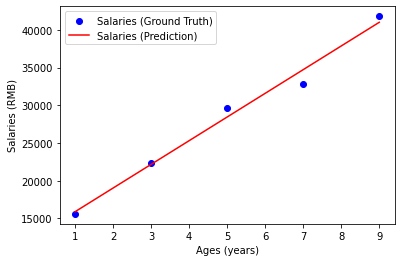

In [6]:
# Visualize the results
plt.scatter(ages, salaries, color='blue', 
            label='Salaries (Ground Truth)')
plt.plot(ages, model.predict(ages), color='red', 
         label='Salaries (Prediction)')
plt.xlabel('Ages (years)')
plt.ylabel('Salaries (RMB)')
plt.legend()
plt.show()

By this point, we have successfully helped my friend predict his future salary. And what today's content is about is an example of Simple Linear RegressionSimple Linear Regression, which can also be referred to as one-dimensional linear regression because our model has only one feature - that is, the number of years of work.